# bank_integration = bank_months_count + has_other_cards*bank_months_count
    - having more cards with a bank (has_other_cards) holding an account for a longer period of and would likely suggest that the customer is more integrated and has a relationship with the bank.
    - hence, a customer with higher integration with a bank would less likely have the intention to commit fraud at the bank
    - bank_integration = bank_months_count + has_other_cards*bank_months_count as has_other_cards is binary and having it multiplied by bank_months_count would give it a higher weightage as compared to the bank_months_count column
    
Hypothesis:
- H0: There is no significant difference in the rate of fraudulent cases between the group with low bank integration and the rest of the population.
- H1: Applicants with low bank integration tend to have higher fraud rates

In [1]:
import pandas as pd
import numpy as np

In [2]:
x_train =  pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
df = pd.concat([x_train, y_train], axis=1)

In [3]:

df['bank_integration'] = df['bank_months_count'] + df['has_other_cards']*df['bank_months_count']

<AxesSubplot:>

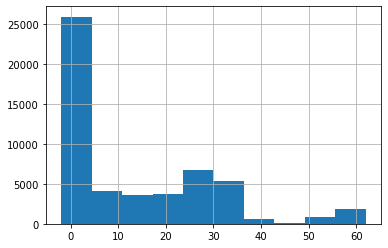

In [4]:
df['bank_integration'].hist()

In [5]:
df['bank_integration'].describe()

count    52776.000000
mean        12.943971
std         15.937975
min         -2.000000
25%         -1.000000
50%          5.000000
75%         26.000000
max         62.000000
Name: bank_integration, dtype: float64

# use centre value to as threshold to determine 'higher' and 'lower' levels of bank_integration

In [6]:
threshold = (df['bank_integration'].max() + df['bank_integration'].min())/2

In [7]:
distribution = df.groupby(['bank_integration', 'fraud_bool']).size().unstack(fill_value=0)
distribution_percentage = distribution.div(distribution.sum(axis=1), axis=0) * 100
distribution_percentage.reset_index(drop=False, inplace=True)
distribution_percentage.head()

fraud_bool,bank_integration,0,1
0,-2,89.042876,10.957124
1,-1,75.083954,24.916046
2,1,87.408861,12.591139
3,2,88.772846,11.227154
4,3,92.429022,7.570978


In [8]:
import numpy as np
import scipy.stats as stats
from numpy.random import randn
 
stats.shapiro(distribution_percentage[0])

ShapiroResult(statistic=0.6400927901268005, pvalue=1.7349509606745528e-09)

As p-value<0.05, we have sufficient evidence to reject the null hypothesis to say that sample does not come from a normal distribution.

As distribution of the proportion of fraud cases across values of bank_integration cannot be assumed as normal, will use Mann-Whitney U test for hypothesis testing

# Mann-Whitney U test

In [9]:
low_integration = distribution_percentage[distribution_percentage['bank_integration'] <= threshold][1]
high_integration = distribution_percentage[distribution_percentage['bank_integration'] > threshold][1]

In [10]:
stats.mannwhitneyu(x=low_integration, y=high_integration, alternative='greater')

MannwhitneyuResult(statistic=403.0, pvalue=0.0002611719663051031)

Since the p-value< 0.05, we have sufficient evidence to reject null hypothesis to say that the proportion of fraud cases among lower values of bank_integration is higher than the proportion of fraud cases in higher values of bank_integration